## 根据简单指标构建趋势，然后验证指数向趋势方向运行的概率（做多）

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df = pd.read_csv(r'E:\workspace\qqqhhh\data\rb\zl.csv')  # 螺纹主连日线
#df = pd.read_csv(r'E:\workspace\qqqhhh\data\rb\zlh.csv') # 螺纹主连小时线
#df = pd.read_csv(r'E:\workspace\qqqhhh\data\rb\zs.csv')  # 螺纹指数日线
#df = pd.read_csv(r'E:\workspace\qqqhhh\data\rb\zsh.csv') # 螺纹指数小时线

#构建指标
def get_DKX(df, n=10):
    df['a'] = (df.c * 3 + df.l + df.o + df.h)/6
    df['b'] = (20*df.a + 19*df.a.shift(1) + 18*df.a.shift(2) + 17*df.a.shift(3) + 
        16*df.a.shift(4) + 15*df.a.shift(5) + 14*df.a.shift(6) + 
        13*df.a.shift(7) + 12*df.a.shift(8) + 11*df.a.shift(9) + 
        10*df.a.shift(10) + 9*df.a.shift(11) + 8*df.a.shift(12) + 7*df.a.shift(13) + 
        6*df.a.shift(14) + 5*df.a.shift(15) + 4*df.a.shift(16) + 
        3*df.a.shift(17) + 2*df.a.shift(18) + 1*df.a.shift(19))/210
    df['d'] = df.b.rolling(n).mean()
    return df.drop(['a'], axis=1)



# 显示结果的函数
def result(df):
    '''df is dataframe'''
    df['c_up'] = np.where( df.c > df.c.shift(1), 1, 0 )
    gailv = np.round(df.c_up.sum()/df.shape[0], 3) * 100
    gailv = str(gailv)[:4]
    print( '收盘价比前一天收盘价高的概率 {}% '.format(gailv)) # 某条件下   c比前一天高的概率
    
    df['l_up'] = np.where( df.l > df.l.shift(1), 1, 0 )
    gailv2 = round(df.l_up.sum()/df.shape[0], 3) * 100
    gailv2 = str(gailv2)[:4]
    print('最低价比前一天最低价高的概率 {}%'.format(gailv2)) # 某条件下   low比前一天高的概率
    return gailv, gailv2

def ready(whichdata):
    df = pd.read_csv(r'E:\workspace\qqqhhh\data\rb\{}.csv'.format(whichdata))
    df = get_DKX(df) 
    df['ma'] = df.c.rolling(window=10, center=False).mean()
    return df.copy()

columns = ['主连日线','主连小时线','指数日线','指数小时线']
index = ['DKXb向上','K线高于DKXb','ma向上','K线高于ma']
# 收盘价各种情况比较
dfc = pd.DataFrame(index=index, columns=columns)
# 最低价各种情况比较
dfl = pd.DataFrame(index=index, columns=columns)

## 过滤数据   主连日线

In [2]:
# 过滤出DKX 的b线 向上的数据
df = ready('zl')
df['DKX_b_up'] = np.where(df.b > df.b.shift(1), 1, 0)
df = df.loc[df.DKX_b_up==1,:]
c1,l1 = result(df)

# 过滤出k线比DKX b线 高的数据
df = ready('zl')
df['higher_DKX'] = np.where(df.l > df.b, 1, 0)
df = df.loc[df.higher_DKX==1,:]
c2,l2 = result(df)

# 过滤出ma向上的数据
df = ready('zl')
df['ma_up'] = np.where(df.ma > df.ma.shift(1), 1, 0)
df = df.loc[df.ma_up==1, :]
c3,l3 = result(df)

# k线在ma上的数据
df = ready('zl')
df['ma_up'] = np.where(df.l > df.ma, 1, 0)
df = df.loc[df.ma_up==1, :]
c4,l4 = result(df)

dfc['主连日线'] = [c1,c2,c3,c4]
dfl['主连日线'] = [l1,l2,l3,l4]


收盘价比前一天收盘价高的概率 51.9% 
最低价比前一天最低价高的概率 57.3%
收盘价比前一天收盘价高的概率 54.4% 
最低价比前一天最低价高的概率 61.2%
收盘价比前一天收盘价高的概率 52.4% 
最低价比前一天最低价高的概率 59.2%
收盘价比前一天收盘价高的概率 55.3% 
最低价比前一天最低价高的概率 63.6%


## 过滤数据   主连小时线

In [3]:
# 过滤出DKX 的b线 向上的数据
df = ready('zlh')
df['DKX_b_up'] = np.where(df.b > df.b.shift(1), 1, 0)
df = df.loc[df.DKX_b_up==1,:]
c1, l1 = result(df)

# 过滤出k线比DKX b线 高的数据
df = ready('zlh')
df['higher_DKX'] = np.where(df.l > df.b, 1, 0)
df = df.loc[df.higher_DKX==1,:]
c2, l2 = result(df)

# 过滤出ma向上的数据
df = ready('zlh')
df['ma_up'] = np.where(df.ma > df.ma.shift(1), 1, 0)
df = df.loc[df.ma_up==1, :]
c3, l3 = result(df)

# k线在ma上的数据
df = ready('zlh')
df['ma_up'] = np.where(df.l > df.ma, 1, 0)
df = df.loc[df.ma_up==1, :]
c4, l4 = result(df)

dfc['主连小时线'] = [c1,c2,c3,c4]
dfl['主连小时线'] = [l1,l2,l3,l4]


收盘价比前一天收盘价高的概率 51.4% 
最低价比前一天最低价高的概率 58.2%
收盘价比前一天收盘价高的概率 54.5% 
最低价比前一天最低价高的概率 62.6%
收盘价比前一天收盘价高的概率 52.3% 
最低价比前一天最低价高的概率 58.4%
收盘价比前一天收盘价高的概率 56.1% 
最低价比前一天最低价高的概率 64.8%


## 过滤数据 主连日线

In [4]:
# 过滤出DKX 的b线 向上的数据
df = ready('zs')
df['DKX_b_up'] = np.where(df.b > df.b.shift(1), 1, 0)
df = df.loc[df.DKX_b_up==1,:]
c1,l1 = result(df)

# 过滤出k线比DKX b线 高的数据
df = ready('zs')
df['higher_DKX'] = np.where(df.l > df.b, 1, 0)
df = df.loc[df.higher_DKX==1,:]
c2,l2 = result(df)

# 过滤出ma向上的数据
df = ready('zs')
df['ma_up'] = np.where(df.ma > df.ma.shift(1), 1, 0)
df = df.loc[df.ma_up==1, :]
c3,l3 = result(df)

# k线在ma上的数据
df = ready('zs')
df['ma_up'] = np.where(df.l > df.ma, 1, 0)
df = df.loc[df.ma_up==1, :]
c4,l4 = result(df)

dfc['指数日线'] = [c1,c2,c3,c4]
dfl['指数日线'] = [l1,l2,l3,l4]

收盘价比前一天收盘价高的概率 54.3% 
最低价比前一天最低价高的概率 59.7%
收盘价比前一天收盘价高的概率 56.3% 
最低价比前一天最低价高的概率 63.7%
收盘价比前一天收盘价高的概率 54.3% 
最低价比前一天最低价高的概率 61.1%
收盘价比前一天收盘价高的概率 56.2% 
最低价比前一天最低价高的概率 65.4%


## 过滤数据 主连小时线

In [5]:
# 过滤出DKX 的b线 向上的数据
df = ready('zsh')
df['DKX_b_up'] = np.where(df.b > df.b.shift(1), 1, 0)
df = df.loc[df.DKX_b_up==1,:]
c1,l1 = result(df)

# 过滤出k线比DKX b线 高的数据
df = ready('zsh')
df['higher_DKX'] = np.where(df.l > df.b, 1, 0)
df = df.loc[df.higher_DKX==1,:]
c2,l2 = result(df)

# 过滤出ma向上的数据
df = ready('zsh')
df['ma_up'] = np.where(df.ma > df.ma.shift(1), 1, 0)
df = df.loc[df.ma_up==1, :]
c3,l3 = result(df)

# k线在ma上的数据
df = ready('zsh')
df['ma_up'] = np.where(df.l > df.ma, 1, 0)
df = df.loc[df.ma_up==1, :]
c4,l4 = result(df)

dfc['指数小时线'] = [c1,c2,c3,c4]
dfl['指数小时线'] = [l1,l2,l3,l4]
dfc = dfc.astype(float)
dfl = dfl.astype(float)
print(dfc)
print(dfl)

收盘价比前一天收盘价高的概率 54.3% 
最低价比前一天最低价高的概率 60.7%
收盘价比前一天收盘价高的概率 56.8% 
最低价比前一天最低价高的概率 65.0%
收盘价比前一天收盘价高的概率 55.3% 
最低价比前一天最低价高的概率 61.6%
收盘价比前一天收盘价高的概率 58.6% 
最低价比前一天最低价高的概率 67.0%
          主连日线  主连小时线  指数日线  指数小时线
DKXb向上    51.9   51.4  54.3   54.3
K线高于DKXb  54.4   54.5  56.3   56.8
ma向上      52.4   52.3  54.3   55.3
K线高于ma    55.3   56.1  56.2   58.6
          主连日线  主连小时线  指数日线  指数小时线
DKXb向上    57.3   58.2  59.7   60.7
K线高于DKXb  61.2   62.6  63.7   65.0
ma向上      59.2   58.4  61.1   61.6
K线高于ma    63.6   64.8  65.4   67.0


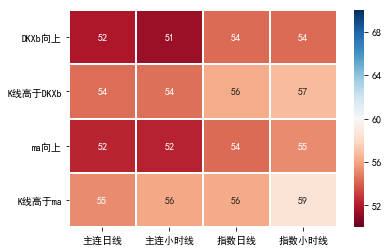

In [6]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
ax = sns.heatmap(dfc, center=60, linewidths=1, 
                 cmap="RdBu", vmin=50, vmax=70, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0)
plt.show()

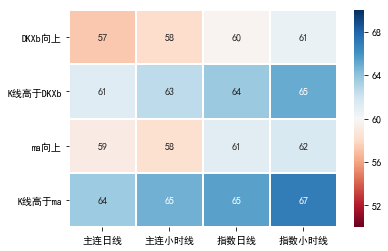

In [7]:
plt.rcParams['font.sans-serif'] = ['SimHei'] 
ax = sns.heatmap(dfl, center=60, linewidths=1, 
                 cmap="RdBu", vmin=50, vmax=70, annot=True)
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=0)
ax.set_yticklabels(ax.yaxis.get_majorticklabels(), rotation=0)
plt.show()